In [ ]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install scipy


### Working Data

In [ ]:
import pandas as pd
fromage=pd.read_table(r"./fromage.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())
print('Dataset Shape:',fromage.shape)
print(fromage)

Given the dataset shape: we have 29 instances with 9 attributes,
Attributes: calories, sodium, calcium, lipides, retinol, folates, proteines, cholesterol and magnesium

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(fromage, alpha=0.5,figsize=(9,9), diagonal='kde')
plt.show()

Attributes correlation (`scatter_matrix` analysis):
- calories & cholesterol, calories & lipides, lipides & cholesterol are positively correlated, some of them could be omitted 

### K-means

In [ ]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print('K-means transformation:',kmeans.transform(fromage))
print("Clusters Centers:",kmeans.cluster_centers_)

#### Silhouette coefficient metric for K clusters: (`k-means model`)

In [ ]:
from sklearn import metrics
result = np.arange(9, dtype ="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters = k+2)
  km.fit(fromage)
  result[k] = metrics.silhouette_score(fromage,km.labels_) # save 

print ('Silhouette coefficient for each k [2..10] :\n',result)

import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("K clusters")
plt.plot(np.arange(2,11,1),(result))
plt.show

Based on the results:
- The closer the `Silhouette` to `1` the better the classification, then k=2 is the best number of clusters
- The objective of classification is to have the most similar instances in a cluster, thus 2 clusters (k=2) can't be enough, so k=3 or k=5 would be the better fit.

### Agglomerative Hierarchical Clustering (CHA) using `scipy`

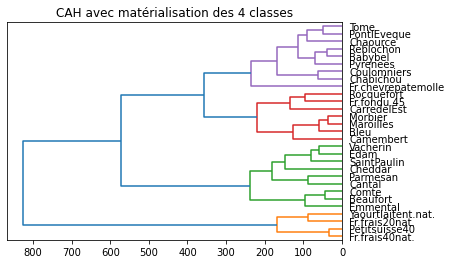

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [42]:
import pandas
import numpy as np
#CAH Libraries
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#Dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#sorted groups indexes
idg = np.argsort(groupes_cah)
#display oberservations and their groups
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

#### Correspondence between CAH groups and K-means groups

In [ ]:
pd.crosstab(kmeans.labels_,groupes_cah)

### Classes interpretation (PCA: Principal components analysis)

The `ACP` have as an objective to transform correlated variables to new non correlated varibales (principal components), Thus reducing the amount of varibales resulting in less redundancy

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
  plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

-> The blue group is isolated from the rest of the groups, making the nature of the clusters harder to interpret

### Agglomerative Hierarchical Clustering (CHA) using `sklearn.cluster.AgglomerativeClustering`

In [ ]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
agg_c = AgglomerativeClustering(n_clusters=4)
agg_c.fit(fromage)
idk_ = np.argsort(agg_c.labels_)
print(pd.DataFrame(fromage.index[idk_],agg_c.labels_[idk_]))

In [ ]:
pd.crosstab(kmeans.labels_,groupes_cah)

In [ ]:
pd.crosstab(kmeans.labels_,agg_c.labels_)

Identical results retrived using `sklearn.cluster.AgglomerativeClustering` and `scipy.cluster.hierarchy` (when compared to `k-means` results)

#### Silhouette coefficient with `sklearn.cluster.AgglomerativeClustering`

In [ ]:
from sklearn import metrics
res=np.arange(9, dtype="double")
for k in np.arange(9):
  agg=AgglomerativeClustering(n_clusters= k + 2)
  agg.fit(fromage)
  res[k]=metrics.silhouette_score(fromage,agg.labels_)
  print(res)
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

### Dvisive Clusting based on `K-means`

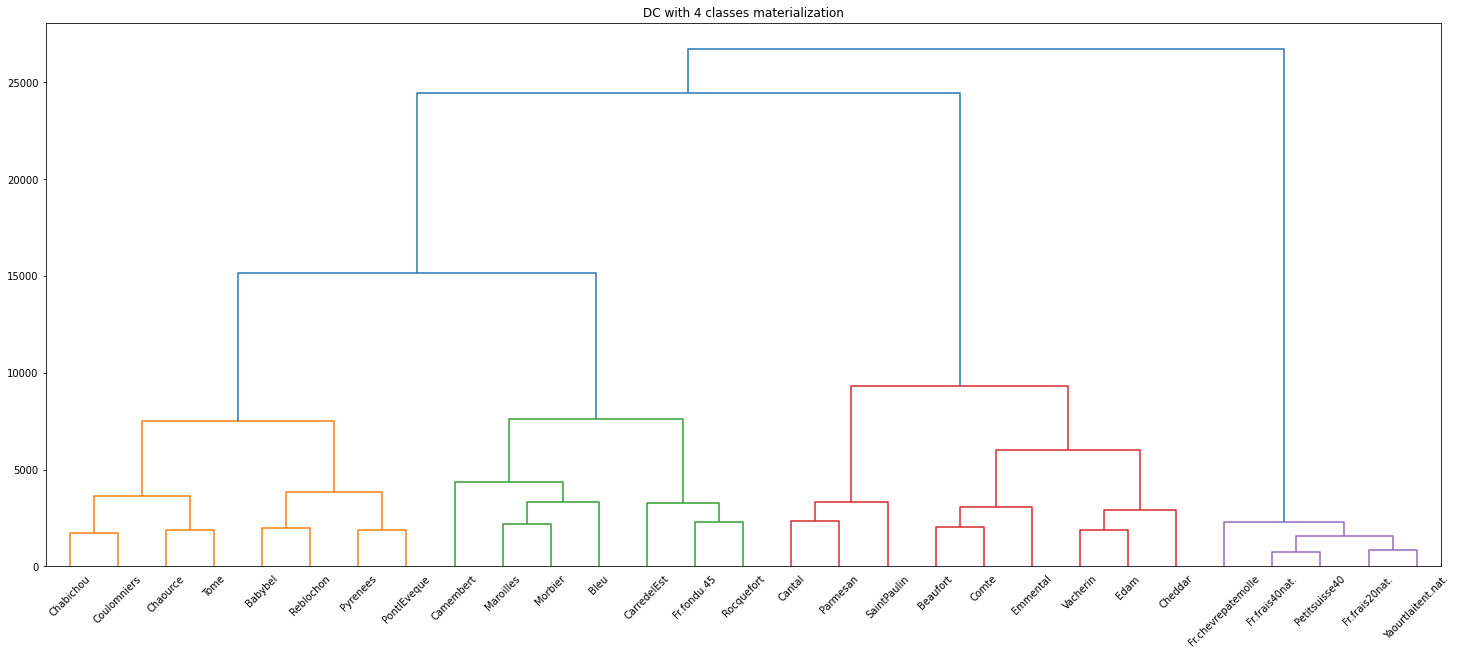

In [46]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Z contains 'linkage'
Z = []

# Starts the algorithm
def run(data):
  # Initializing the global variable Z
  global Z
  Z = []
  index = split(data,data)
  fig = plt.figure(figsize=(25, 10))
  plt.title('DC with 4 classes materialization')
  dn = dendrogram(Z,labels=data.index, color_threshold=14000)

# Returns the index of a specific line in the dataset
def get_index(line, full_dataset):
  indexes = np.argwhere(full_dataset.index==line.index[0])
  return indexes[0][0]

# Retourns the value of a given index in the dataset
def get_value(index,full_dataset):
  n = len(full_dataset)
  if(index >= n):
    return Z[index-n][2]
  else:
    return sum(full_dataset.iloc[index])

# Retourns the distance between two elements
def get_distance(index1, index2,full_dataset):
  return get_value(index1,full_dataset) + get_value(index2,full_dataset)

# Retourns the number of elements (from the original dataset) in the cluster
def get_originals(index,full_dataset):
  n = len(full_dataset)
  if(index >= n):
    return Z[index-n][3]
  else:
    return 1

# slpit() is a recursive function allowing to divide the dataset into two groups using k-means clustering algorithm
# the stop condition: having groups with single element
# in each iteration, linkage is saved in Z
def split(data, full_dataset):
  n = len(full_dataset)
  if len(data) < 2:
    return get_index(data,full_dataset)
  
  # k-means init
  km = KMeans(n_clusters=2)
  km.fit(data)
  
  class1 = data[km.labels_==0]
  class2 = data[km.labels_==1]
  index1 = split(class1,full_dataset)
  index2 = split(class2,full_dataset)


  # Increment Z (linkage)
  Z.append([index1, # Index group1
            index2, # Index group2
            get_distance(index1, index2,full_dataset), # group value
            get_originals(index1,full_dataset)+get_originals(index2,full_dataset)]) # number of elements in the group
  
  # Return element index
  return len(Z)-1+n

run(fromage)